<a href="https://colab.research.google.com/github/MRS028/AI-ML-Learning/blob/main/Module_13__Multiple_Linear_Regression_and_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 13: Multiple Linear Regression and Polynomial Regression

This notebook contains all coding parts for Module 13 using a real world dataset from `scikit-learn`.

We will work through the following sections:
1. Section 0: Setup and Data Loading
2. Section 1: Introduction to Multiple Linear Regression (Notebook part)
3. Section 3: Coding Multiple Linear Regression on Real Data
4. Section 4: Introduction to Polynomial Regression (Notebook part)
5. Section 6: Coding Polynomial Regression on Real Data

Sections 2 and 5 are math and concept heavy, so those will be handled in slides, not in this notebook.

## Section 0: Setup and Data Loading

In this section we:
- Import all required libraries
- Load the California Housing dataset from `scikit-learn`
- Wrap it into a pandas DataFrame
- Inspect the basic structure and summary statistics

The California Housing dataset is based on real census information, so it is a good example of a real world regression problem.

In [91]:
# Section 0: Setup - Import libraries

import numpy as np              # For numerical operations and arrays
import pandas as pd             # For working with tabular data
import matplotlib.pyplot as plt # For plotting graphs

from sklearn.datasets import fetch_california_housing   # Real world regression dataset
from sklearn.model_selection import train_test_split    # Train test split utility
from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True


In [92]:
# Load the California Housing dataset

# california = fetch_california_housing(as_frame=True)
alt_csv_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(alt_csv_url)

# `california.frame` is a pandas DataFrame that already includes
# both the features and the target column

# df = df_alt.frame.copy()

print(df.shape)
# print(df.info)
df.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**Feature Descriptions:**

1. **MedInc:** Median income of households in the block (measured in tens of thousands of US dollars).

2. **HouseAge:** Median age of the houses in the block (in years).

3. **AveRooms:** Average number of rooms per household in the block.

4. **AveBedrms:** Average number of bedrooms per household in the block.

5. **Population:** Total number of people living in the block.

6. **AveOccup:** Average number of occupants per household in the block.

7. **Latitude:** Geographic latitude of the block; higher values indicate farther north.

8. **Longitude:** Geographic longitude of the block; higher values indicate farther west.

9. **MedHouseVal:** Median house value for households in the block (in US dollars).

In [93]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
# Summary statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Section 1: Introduction to Multiple Linear Regression (Notebook part)

In multiple linear regression, we use several input features together to predict a single numeric target.

In this dataset:
- **Target (y)**: `MedHouseVal` (median house value in a block)
- **Candidate features (X)**: income, house age, average rooms, average bedrooms, population, average occupancy

In this section we will:
- Select a subset of features as our input matrix `X`
- Set `MedHouseVal` as the target `y`
- Inspect the shapes
- Look at simple correlations to build intuition about relationships

In [95]:
# Define target and feature columns

target_col ='median_house_value'

# Corrected feature_cols to remove duplicate 'median_income'
feature_cols = ['median_income', 'housing_median_age', 'total_bedrooms', 'total_rooms', 'population']

X = df[feature_cols]
y = df[target_col]

# Handle missing values by dropping rows with NaN in the selected feature columns
X = X.dropna()
y = y.loc[X.index] # Ensure y matches the rows remaining in X

X.head(10).T

,0,1,2,3,4,5,6,7,8,9
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912
housing_median_age,41.0000,21.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.00,42.0000,52.0000
total_bedrooms,129.0000,1106.0000,190.0000,235.0000,280.0000,213.0000,489.0000,687.00,665.0000,707.0000
total_rooms,880.0000,7099.0000,1467.0000,1274.0000,1627.0000,919.0000,2535.0000,3104.00,2555.0000,3549.0000
population,322.0000,2401.0000,496.0000,558.0000,565.0000,413.0000,1094.0000,1157.00,1206.0000,1551.0000


In [96]:
# Check shapes of X and y

print('Shape of X: ', X.shape)  # (number_of_rows, number_of_features)
print('Shape of y: ', y.shape)  # (number_of_rows,)

Shape of X:  (20433, 5)
Shape of y:  (20433,)


Correlation matrix: 
                    median_income  housing_median_age  total_bedrooms  \
median_income            1.000000           -0.119034       -0.007723   
housing_median_age      -0.119034            1.000000       -0.320451   
total_bedrooms          -0.007723           -0.320451        1.000000   
total_rooms              0.198050           -0.361262        0.930380   
population               0.004834           -0.296244        0.877747   
median_house_value       0.688075            0.105623        0.049686   

                    total_rooms  population  median_house_value  
median_income          0.198050    0.004834            0.688075  
housing_median_age    -0.361262   -0.296244            0.105623  
total_bedrooms         0.930380    0.877747            0.049686  
total_rooms            1.000000    0.857126            0.134153  
population             0.857126    1.000000           -0.024650  
median_house_value     0.134153   -0.024650            1.000000  


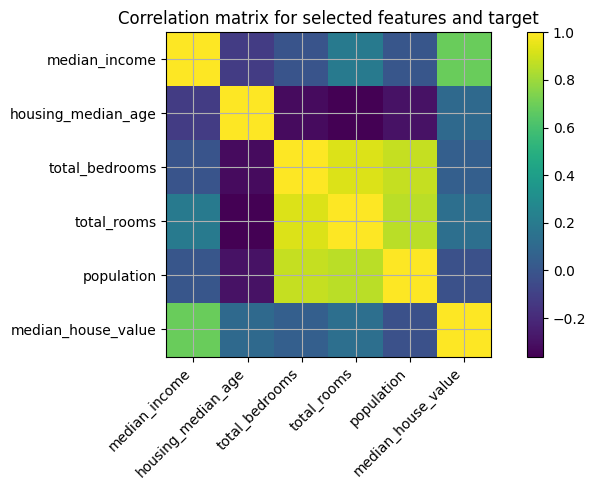

In [97]:
# Simple correlation matrix between selected features and the target
corr_matrix = df[feature_cols + [target_col]].corr()
print("Correlation matrix: ")
print(corr_matrix)


# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.tight_layout()
plt.show()

## Section 3: Coding Multiple Linear Regression on Real Data

In this section we implement a full workflow for multiple linear regression:

1. Split the data into training and test sets
2. Fit a `LinearRegression` model on the training data
3. Inspect the learned coefficients and intercept
4. Make predictions on train and test sets
5. Evaluate the model using MAE, RMSE, and R squared
6. Visualize predicted vs actual values
7. Plot residuals to check basic patterns

We will use the feature matrix `X` and target `y` defined in Section 1.

In [98]:
# Step 1: Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size: ", X_train.shape[0], "rows")
print("Test set size: ", X_test.shape[0], "rows")

Training set size:  16346 rows
Test set size:  4087 rows


In [99]:
# Step 2: Create and fit the Linear Regression model
lin_reg = LinearRegression()


# .fit() learns the best coefficients from the training data
lin_reg.fit(X_train, y_train)
print('Model fitted successfully')

Model fitted successfully


In [100]:
# Step 3: Inspect learned parameters (coefficients and intercept)
print('Intercept (bias term): ', lin_reg.intercept_)
print('\nCoefficients: ')
for feature_name, coef in zip(feature_cols, lin_reg.coef_):
  print(f'{feature_name}: {coef}')

Intercept (bias term):  -49251.48200593953

Coefficients: 
median_income: 48428.322676339296
housing_median_age: 1935.4212883435785
total_bedrooms: 193.69157500984755
total_rooms: -20.89897711720687
population: -25.25753518531839


In [101]:
# Step 4: Make predictions on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print('Some sample predicitons on test set (first 5 rows): ')
print('Predicted: ', y_test_pred[:5])
print('Actual: ', y_test.values[:5])

Some sample predicitons on test set (first 5 rows): 
Predicted:  [164145.17236867 170233.91491971 195689.11271989 158134.95198336
 203947.00974416]
Actual:  [245800. 137900. 218200. 220800. 170500.]


In [102]:
# Step 5: Define a helper function to print evaluation metrics
def regression_metrics(y_true, y_pred, label='Model'):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'=== {label} ====')
  print('MAE: ', mae)
  print('RMSE: ', rmse)
  print('R2 : ', r2)
  print()

# Evaluate on train and test
regression_metrics(y_train, y_train_pred, label='Linear Regression (Train)')
regression_metrics(y_test, y_test_pred, label='Linear Regression (Test)')

=== Linear Regression (Train) ====
MAE:  55978.62243225715
RMSE:  76231.24439270173
R2 :  0.5609839095757148

=== Linear Regression (Test) ====
MAE:  57019.34200160653
RMSE:  77195.94812219725
R2 :  0.5642313984935021



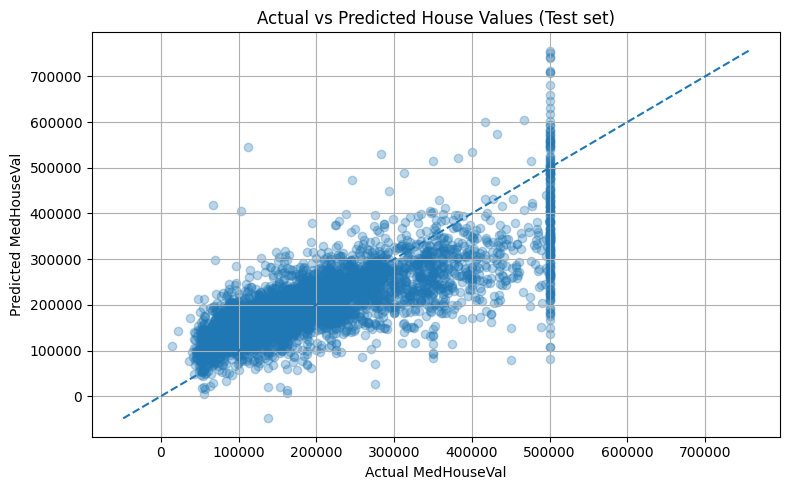

In [103]:
# Step 6: Plot predicted vs actual values on the test set

plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted House Values (Test set)')

# Diagonal reference line
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.tight_layout()
plt.show()

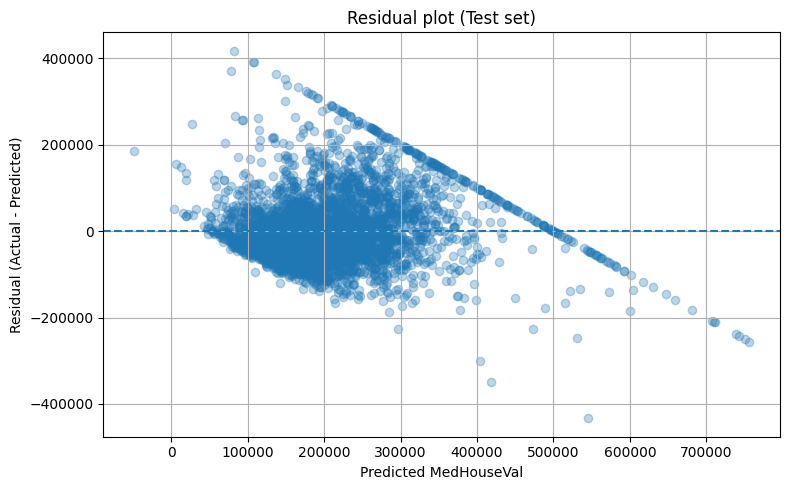

In [104]:
# Step 7: Residual plot (errors = actual - predicted)

residuals = y_test - y_test_pred

plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual plot (Test set)')
plt.tight_layout()
plt.show()


## Section 4: Introduction to Polynomial Regression (Notebook part)

Polynomial regression keeps the model **linear in parameters** but allows nonlinear relationships between the input feature and the target by adding polynomial terms.

In this notebook part we:
- Use a **single feature** `MedInc` (median income) to predict `MedHouseVal`
- Fit a simple **linear model** on this single feature
- Visualize the linear fit

Later, in Section 6, we will extend this to polynomial regression using `PolynomialFeatures` and `Pipeline`.

In [105]:
# Prepare a single feature for illustration: MedInc vs MedHouseVal

X_single = df[['median_income']]  # DataFrame with one column
y_single = df[target_col]

X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

print('Single feature training shape:', X_single_train.shape)
print('Single feature test shape    :', X_single_test.shape)

Single feature training shape: (16512, 1)
Single feature test shape    : (4128, 1)


In [106]:
# Fit a simple Linear Regression model using only MedInc
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single_train, y_single_train)
y_single_test_pred = lin_reg_single.predict(X_single_test)

regression_metrics(y_single_test, y_single_test_pred, label='Single Feature Linear Regression (Test)')

=== Single Feature Linear Regression (Test) ====
MAE:  62990.86530093761
RMSE:  84209.01241414454
R2 :  0.45885918903846656



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


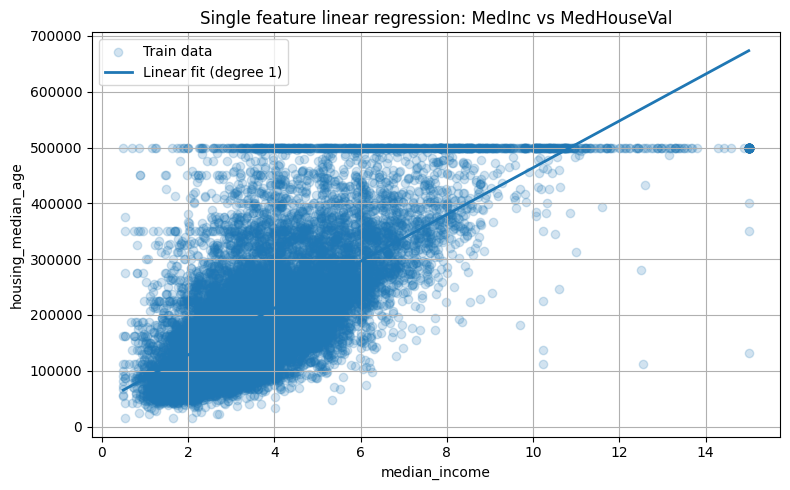

In [107]:
# Visualize the linear fit for the single feature model

# Create a grid of MedInc values for a smooth line
X_plot = np.linspace(X_single['median_income'].min(), X_single['median_income'].max(), 200).reshape(-1, 1)

y_plot_lin = lin_reg_single.predict(X_plot)

plt.figure()
plt.scatter(X_single_train['median_income'], y_single_train, alpha=0.2, label='Train data')
plt.plot(X_plot, y_plot_lin, linewidth=2, label='Linear fit (degree 1)')
plt.xlabel('median_income')
plt.ylabel('housing_median_age')
plt.title('Single feature linear regression: MedInc vs MedHouseVal')
plt.legend()
plt.tight_layout()
plt.show()

## Section 6: Coding Polynomial Regression on Real Data

In this section we:

- Use the same single feature `MedInc`
- Create polynomial features of different degrees (1, 2, 3, and 5)
- Fit a linear regression model on these expanded features using `Pipeline`
- Compare performance (R squared and RMSE) for each degree

Key new tools:
- `PolynomialFeatures`: expands original features into polynomial combinations
- `Pipeline`: chains polynomial expansion and linear regression into one convenient object

In [108]:
# Compare polynomial regression models of different degrees on the single feature MedInc

degrees = [1,2,3,5]
results = []

for deg in degrees:
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      ('lin_reg', LinearRegression())
  ])

  model.fit(X_single_train, y_single_train)

  y_train_pred_deg = model.predict(X_single_train)
  y_test_pred_deg = model.predict(X_single_test)

  mae_train = mean_absolute_error(y_single_train, y_train_pred_deg)
  rmse_train = np.sqrt(mean_squared_error(y_single_train, y_train_pred_deg))
  r2_train = r2_score(y_single_train, y_train_pred_deg)

  mae_test = mean_absolute_error(y_single_test, y_test_pred_deg)
  rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred_deg))
  r2_test = r2_score(y_single_test, y_test_pred_deg)

  results.append({
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
  })

results_df = pd.DataFrame(results)
results_df

,degree,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,1,62495.076557,83614.874097,0.476993,62990.865301,84209.012414,0.458859
1,2,62404.930868,83245.948713,0.481598,62829.155887,83861.389691,0.463318
2,3,61500.992616,82503.304221,0.490806,62189.632170,83564.135519,0.467116
3,5,61441.077142,82484.431542,0.491039,62136.935976,83589.224337,0.466796


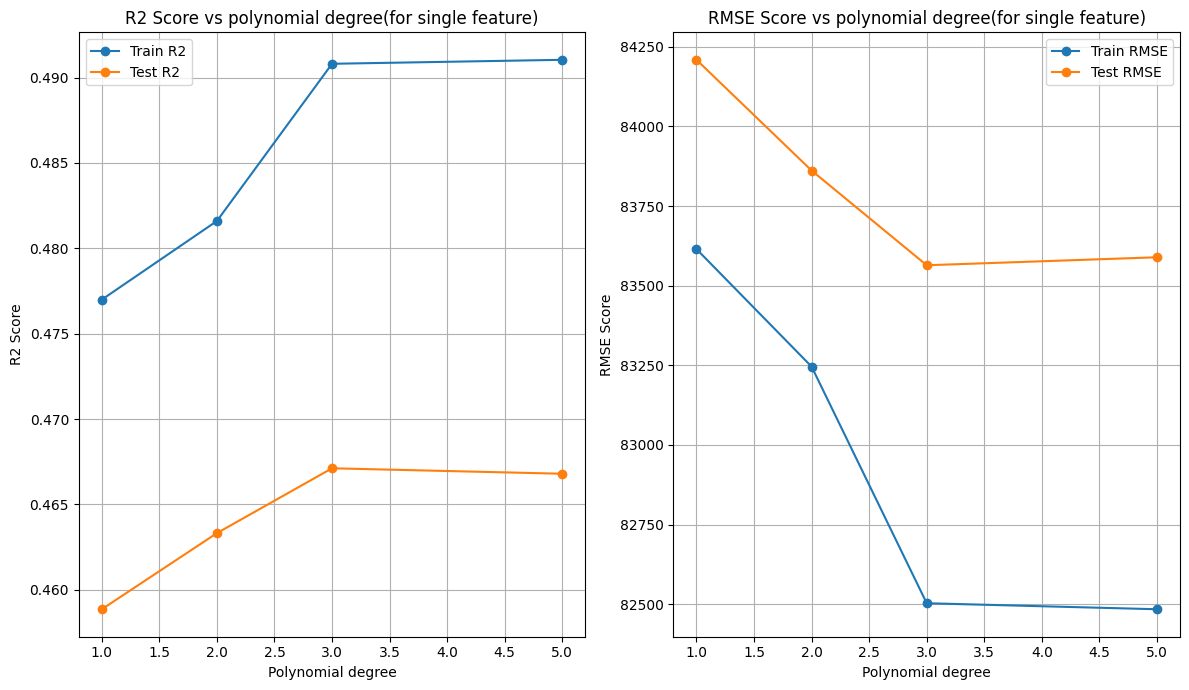

In [109]:
# Plot R squared and RMSE vs polynomial degree
fig, axes = plt.subplots(1,2, figsize=(12,7))


# R squared plot
axes[0].plot(results_df['degree'], results_df['R2_train'],marker='o',label='Train R2')
axes[0].plot(results_df['degree'], results_df['R2_test'],marker='o',label='Test R2')
axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree(for single feature)")
axes[0].legend()

# RMSE plot
axes[1].plot(results_df['degree'], results_df['RMSE_train'],marker='o',label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['RMSE_test'],marker='o',label='Test RMSE')
axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree(for single feature)")
axes[1].legend()

plt.tight_layout()
plt.show()


### Optional: Polynomial Regression with Two Features

The main ideas can also extend to more than one feature. As an optional extension, we can use two features
`MedInc` and `HouseAge` together with polynomial degree 2.

In [110]:
# Optional block: polynomial regression with two features (degree 2)

feature_cols_two = ['median_income', 'housing_median_age']
X_two = df[feature_cols_two]

# Redefine y_two to ensure it has the same number of samples as X_two
y_two = df[target_col]

X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    X_two, y_two, test_size=0.2, random_state=42
)

deg = 2

poly_model_two = Pipeline([
    ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_model_two.fit(X_two_train, y_two_train)

y_two_test_pred = poly_model_two.predict(X_two_test)

regression_metrics(y_two_test, y_two_test_pred,
                   label='Polynomial regression (degree 2, two features)')

=== Polynomial regression (degree 2, two features) ====
MAE:  60130.643941428716
RMSE:  80620.3871690102
R2 :  0.5039986038552433



In [111]:
# All features
X_all = df.drop(['median_income', 'ocean_proximity'], axis=1)

# The target for this optional section is 'housing_median_age'
y_all = df['housing_median_age']

# Handle missing values in X_all and align y_all
# Create a combined DataFrame to easily drop rows with NaNs in either X or y
combined_df = X_all.copy()
combined_df['target'] = y_all
combined_df = combined_df.dropna()

X_all = combined_df.drop('target', axis=1)
y_all = combined_df['target']

# Train-test split
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

# Polynomial Regression (degree 2) with all features
degree = 2

poly_all_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('lin_reg', LinearRegression())
])

poly_all_model.fit(X_all_train, y_all_train)

y_all_test_pred = poly_all_model.predict(X_all_test)

# Evaluation
regression_metrics(y_all_test, y_all_test_pred,
                   label='Polynomial Regression (degree 2, ALL features)')

=== Polynomial Regression (degree 2, ALL features) ====
MAE:  0.051851667437279286
RMSE:  0.08003537416818411
R2 :  0.999959969595519

